In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 

In [11]:
import matplotlib.pyplot as plt

In [2]:
data = pd.read_stata("twoyear(1).dta")

In [3]:
data

,female,phsrank,BA,AA,black,hispanic,id,exper,jc,univ,...,medcity,submed,lgcity,sublg,vlgcity,subvlg,ne,nc,south,totcoll
0,1,65,0,0,0,0,19.0,161,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
1,1,97,0,0,0,0,93.0,119,0.000000,7.033333,...,0,0,0,0,0,0,0,1,0,7.033333
2,1,44,0,0,0,0,96.0,81,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0.000000
3,1,34,0,0,0,1,119.0,39,0.266667,0.000000,...,0,0,0,0,0,0,0,0,0,0.266667
4,1,80,0,0,0,0,132.0,141,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,1,50,0,0,0,0,89903.0,62,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000
6759,1,50,0,0,0,0,89908.0,111,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000
6760,0,50,0,0,0,0,89933.0,146,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000
6761,0,50,0,0,0,0,89955.0,125,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.000000


In [4]:
Y = data[["lwage"]]
X = data[["totcoll"]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     827.4
Date:                Tue, 25 Oct 2022   Prob (F-statistic):          9.39e-172
Time:                        11:33:32   Log-Likelihood:                -4349.1
No. Observations:                6763   AIC:                             8702.
Df Residuals:                    6761   BIC:                             8716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0916      0.008    267.892      0.0

In [6]:
Y = data[["lwage"]]
X = data[["totcoll", "female"]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [58]:
print(.summary())
print(model.ssr)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     826.2
Date:                Tue, 25 Oct 2022   Prob (F-statistic):          9.68e-322
Time:                        11:59:51   Log-Likelihood:                -4000.0
No. Observations:                6763   AIC:                             8006.
Df Residuals:                    6760   BIC:                             8026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2530      0.010    236.923      0.0

In [15]:
female_data = data[data["female"] == 1]
male_data = data[data["female"] == 0]

In [36]:
Y = female_data[["lwage"]]
X = female_data[["totcoll"]]
X = sm.add_constant(X)
female_fit = sm.OLS(Y, X).fit()

In [43]:
female_slope = female_fit.params
female_slope

const      1.931502
totcoll    0.079570
dtype: float64

In [39]:
Y = male_data[["lwage"]]
X = male_data[["totcoll"]]
X = sm.add_constant(X)
male_fit = sm.OLS(Y, X).fit()

In [59]:
print(male_fit.summary())
male_fit.ssr

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.63e-51
Time:                        12:00:48   Log-Likelihood:                -1955.6
No. Observations:                3249   AIC:                             3915.
Df Residuals:                    3247   BIC:                             3927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2888      0.011    206.346      0.0

633.9941087525676

In [44]:
male_slope = male_fit.params
male_slope

const      2.288767
totcoll    0.049661
dtype: float64

<AxesSubplot:xlabel='totcoll', ylabel='lwage'>

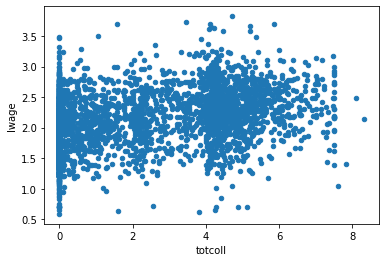

In [42]:
female_data.plot.scatter("totcoll", "lwage")

<AxesSubplot:xlabel='totcoll', ylabel='lwage'>

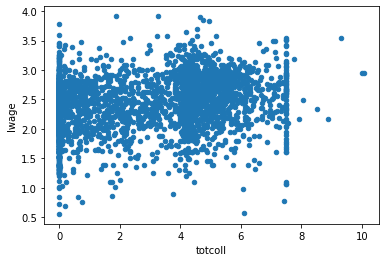

In [17]:
male_data.plot.scatter("totcoll", "lwage")

In [62]:
wage_data = pd.read_stata("WAGE2(3).DTA")

In [63]:
wage_data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [93]:
Y = wage_data[["lwage"]]
X = wage_data[["educ", "exper", "tenure", "married", "black", "south", "urban"]]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     44.75
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.16e-54
Time:                        12:10:30   Log-Likelihood:                -381.55
No. Observations:                 935   AIC:                             779.1
Df Residuals:                     927   BIC:                             817.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3955      0.113     47.653      0.0

In [94]:
wage_data["exper2"] = wage_data["exper"] ** 2
wage_data["tenure2"] = wage_data["tenure"] ** 2
wage_data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,exper2,tenure2
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091,121,4
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562,121,0
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384,121,81
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973,-87,49
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502,-60,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829,36,1
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742,100,9
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858,-112,100
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935,-112,-112


In [95]:
Y = wage_data[["lwage"]]
X = wage_data[["educ", "exper", "tenure", "married", "black", "south", "urban", "exper2", "tenure2"]]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.84e-53
Time:                        12:12:03   Log-Likelihood:                -381.23
No. Observations:                 935   AIC:                             782.5
Df Residuals:                     925   BIC:                             830.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4066      0.114     47.273      0.0

In [96]:
wage_data["educblk"] = wage_data["educ"] * wage_data["black"]
wage_data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,exper2,tenure2,educblk
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091,121,4,0
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562,121,0,0
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384,121,81,0
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973,-87,49,0
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502,-60,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829,36,1,16
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742,100,9,0
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858,-112,100,12
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935,-112,-112,0


In [97]:
Y = wage_data[["lwage"]]
X = wage_data[["educ", "exper", "tenure", "married", "black", "south", "urban", "educblk"]]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     39.32
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           4.35e-54
Time:                        12:13:44   Log-Likelihood:                -380.92
No. Observations:                 935   AIC:                             779.8
Df Residuals:                     926   BIC:                             823.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3748      0.115     46.859      0.0

In [108]:
non_black = wage_data[wage_data["black"] == 0]
non_married_not_black_data = non_black[non_black["married"] == 0]
non_married_not_black_data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,exper2,tenure2,educblk
6,600,40,91,24,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0,6.396930,-87,0,0
12,900,45,125,40,15,4,3,30,0,0,0,0,2,NaN,12.0,12.0,6.802395,16,9,0
29,635,40,128,35,18,8,13,36,0,0,0,1,2,1.0,16.0,16.0,6.453625,64,-87,0
45,981,40,122,41,14,9,15,35,0,0,0,1,3,2.0,12.0,NaN,6.888573,81,-31,0
52,1749,40,108,32,12,13,9,29,0,0,0,1,7,1.0,12.0,9.0,7.466799,-87,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,681,40,94,24,12,18,15,35,0,0,1,1,4,NaN,9.0,10.0,6.523562,68,-31,0
847,661,40,96,25,13,8,6,29,0,0,1,0,3,2.0,NaN,5.0,6.493754,64,36,0
884,400,50,96,38,15,6,10,28,0,0,1,0,5,NaN,12.0,NaN,5.991465,36,100,0
889,485,40,89,24,12,10,9,30,0,0,1,0,4,3.0,12.0,18.0,6.184149,100,81,0


In [106]:
Y = non_married_not_black_data[["lwage"]]
X = non_married_not_black_data[["educ", "exper", "tenure", "south", "urban"]]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.494
Date:                Tue, 25 Oct 2022   Prob (F-statistic):            0.00677
Time:                        12:20:06   Log-Likelihood:                -36.120
No. Observations:                  82   AIC:                             84.24
Df Residuals:                      76   BIC:                             98.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7909      0.408     14.208      0.0

In [111]:
wage_data["marr_blk"] = wage_data["married"] * wage_data["black"]
wage_data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,...,urban,sibs,brthord,meduc,feduc,lwage,exper2,tenure2,educblk,marr_blk
0,769,40,93,35,12,11,2,31,1,0,...,1,1,2.0,8.0,8.0,6.645091,121,4,0,0
1,808,50,119,41,18,11,16,37,1,0,...,1,1,NaN,14.0,14.0,6.694562,121,0,0,0
2,825,40,108,46,14,11,9,33,1,0,...,1,1,2.0,14.0,14.0,6.715384,121,81,0,0
3,650,40,96,32,12,13,7,32,1,0,...,1,4,3.0,12.0,12.0,6.476973,-87,49,0,0
4,562,40,74,27,11,14,5,34,1,0,...,1,10,6.0,6.0,11.0,6.331502,-60,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,...,0,0,1.0,11.0,NaN,6.253829,36,1,16,1
931,1202,40,102,32,13,10,3,31,1,0,...,1,7,7.0,8.0,6.0,7.091742,100,9,0,0
932,538,45,77,22,12,12,10,28,1,1,...,0,9,NaN,7.0,NaN,6.287858,-112,100,12,1
933,873,44,109,25,12,12,12,28,1,0,...,0,1,1.0,NaN,11.0,6.771935,-112,-112,0,0


In [ ]:
Y = wage_data[["lwage"]]
X = non_married_not_black_data[["educ", "exper", "tenure", "married", "south", "urban"]]
X = sm.add_constant(X)
restric = sm.OLS(Y, X).fit()
print(result.summary())

a) $$q=10$$ $$k=l$$$$q=0.1k^{0.2}k^{0.8} = 0.1k$$
$$10=0.1k$$$$k=100$$$$k=l=100$$
$$Cost=50k+50l$$$$Cost=10,000$$

b) $$MP_l=\frac{dq}{dl}=(0.1k^{0.2})(0.8l^{-0.2})$$$$MP_k=\frac{dq}{dk}=(0.1)(0.2k^{-0.8})(l^{0.8})$$
$$MP_l=MP_k$$$$(0.1k^{-0.2})(0.8l^{0.2})=(0.1)(0.2k^{-0.8})(l^{0.8})$$$$k=\frac{0.2}{0.8}l$$
Plug *k* back into *q*
$$q=0.1[\frac{0.2}{0.8}l]^{0.2}l^{0.8}$$
Solve for 10 stools *q*=10
$$10=0.1[\frac{0.2}{0.8}l]^{0.2}l^{0.8}$$$$10=(0.1)[\frac{0.2}{0.8}]^{0.2}l^{0.2}l^{0.8}$$$$100=[\frac{0.2}{0.8}]^{0.2}l$$$$100*[\frac{0.8}{0.2}]^{0.2}=l$$$$l=131.95$$
Solve for *k* 
$$k=\frac{0.2}{0.8}*(131.95)$$$$k=32.9875$$
$$Cost=(50)(32.9875)+(50)(131.95)$$$$Cost=8,246.875$$

c)$$Cost=10,000-8,246.875=$1,753.125$$
Use 1,753.125 for new budget and set equal to cost equation
$$k=\frac{0.2}{0.8}l$$
$$$1,753.125=(50)(\frac{0.2}{0.8}l)+(50)(l)$$
At 1,753.125
$$l=28.0496$$$$k=7.0124$$
$$q=(0.1)(7.0124)^{0.2}*(28.0496)^{0.8}$$$$q=2.126$$
Sam can afford to produce 2 more stools

d)It depends if Carla's unhappiness serving extra customers incurs additional costs for the bar.

 